In [12]:
# Set of colours for the first data
color_SSN = 'royalblue'  # Colour for the data points
color_SSN_uncert = 'darkblue'  # Colour for the uncertainties

# Set of colours for the second data
color_WSO = 'darkorange'  # Colour for the data points
color_WSO_uncert = 'crimson'  # Colour for the uncertainties

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Indlæsning af data

C:\Users\marcu\AppData\Local\Temp\ipykernel_13796\3684869087.py:24: RuntimeWarning: invalid value encountered in sqrt
  SSN_uncert_arr.append(SSN_std_arr[i]/np.sqrt(N_obs_arr[i]))
C:\Users\marcu\AppData\Local\Temp\ipykernel_13796\3684869087.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  SSN_uncert_arr.append(SSN_std_arr[i]/np.sqrt(N_obs_arr[i]))


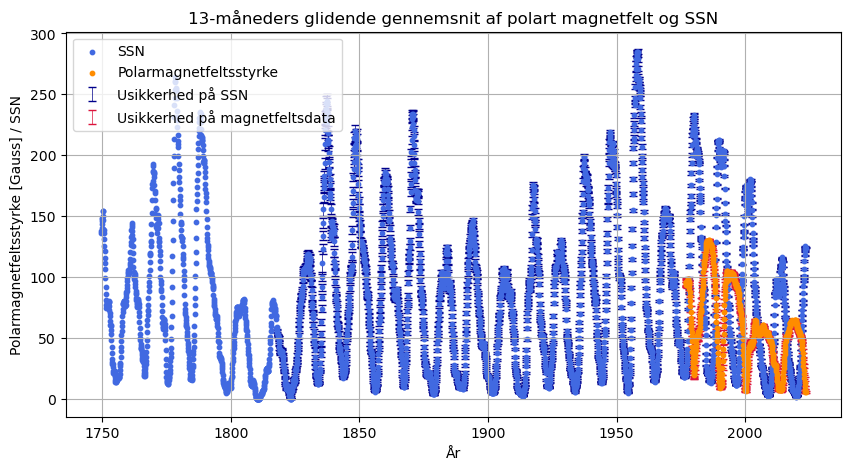

Last date with WSO data: 2023.502737850787


In [14]:
loc1 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\WSO_smoothed.csv"

column_names = ['Date', 'Magnetic_field', 'Uncertainty']
wso_smoothed_data = pd.read_csv(loc1, names=column_names, delimiter=',', skiprows=1)
wso_smoothed_date_arr = wso_smoothed_data['Date'].values.astype(float)
wso_smoothed_magnetic_field_arr = wso_smoothed_data['Magnetic_field'].values.astype(float)
wso_smoothed_uncert_arr = wso_smoothed_data['Uncertainty'].values.astype(float)

loc2 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\13-month smoothed monthly total sunspot number 1-1749 to now.csv"

column_names = ['Year', 'Year_fraction', 'Monthly_smoothed_sunspot_number', 'SSN_STD', 'N_obs', 'DefProvMarker']
sunspot_raw_data = pd.read_csv(loc2, names=column_names, delimiter=';', skiprows=1)
sunspot_raw_data = sunspot_raw_data.iloc[6:-6]

# Sunspot data
SSN_date_fraction_arr = sunspot_raw_data['Year_fraction'].values.astype(float)
SSN_arr = sunspot_raw_data['Monthly_smoothed_sunspot_number'].values.astype(float)
SSN_std_arr = abs(sunspot_raw_data['SSN_STD'].values.astype(float))
N_obs_arr = sunspot_raw_data['N_obs'].values.astype(float)

# Usikkerhed beregnes med "usikkerheden på middelværdien"
SSN_uncert_arr = []
for i in range(len(SSN_arr)):
    SSN_uncert_arr.append(SSN_std_arr[i]/np.sqrt(N_obs_arr[i]))

# Plot
ScatterSize = 10
plt.figure(figsize=(10, 5))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr, SSN_arr, label='SSN', s=ScatterSize, c=color_SSN)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="Usikkerhed på SSN", yerr=SSN_uncert_arr, fmt='none', color=color_SSN_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.scatter(wso_smoothed_date_arr, wso_smoothed_magnetic_field_arr, label='Polarmagnetfeltsstyrke', s=ScatterSize, c=color_WSO)
plt.errorbar(wso_smoothed_date_arr, wso_smoothed_magnetic_field_arr, label="Usikkerhed på magnetfeltsdata", yerr=wso_smoothed_uncert_arr, fmt='none', color=color_WSO_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.xlabel('År')
plt.ylabel(r'Polarmagnetfeltsstyrke [$\mu T$] / SSN')
plt.title('13-måneders glidende gennemsnit af polart magnetfelt og SSN')
plt.legend()
plt.show()

# Print last date with WSO data
print('Last date with WSO data:', wso_smoothed_date_arr[-1])



In [15]:
0.502737850787*12

6.032854209443999

# Fits

In [16]:
# Det index hvor SSN_date_fraction_arr = 1818.538
index = np.where(SSN_date_fraction_arr == 1818.538)[0][0]

# Gem gamle data under andet navn
SSN_date_fraction_arr_old = SSN_date_fraction_arr
SSN_arr_old = SSN_arr
SSN_uncert_arr_old = SSN_uncert_arr

# Slet data før det index
SSN_date_fraction_arr = SSN_date_fraction_arr[index:]
SSN_arr = SSN_arr[index:]
SSN_uncert_arr = SSN_uncert_arr[index:]


In [20]:
# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[300,1/11,1,-100])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var2 , Cov2 = curve_fit(sin2 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var1,1,1/210,1,100])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3
Var3 , Cov3 = curve_fit(sin3 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var2,1,1/11.9,1,1])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4
Var4 , Cov4 = curve_fit(sin4 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var3,1,1/21,1,1])

#5
def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
Var5 , Cov5 = curve_fit(sin5 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var4,1,1/5.5,1,1])

#6
def sin6(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6)
Var6 , Cov6 = curve_fit(sin6 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6)




In [ ]:
# # Fitting

# guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
# guess6 = [float(i) for i in guess6]

# #1
# def sin1(x,a,b,c,d):
#     return a * np.sin( x * b + c ) + d
# Var1 , Cov1 = curve_fit(sin1 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[1,1/33,1,1])

# #2
# def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
#     return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
# Var2 , Cov2 = curve_fit(sin2 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:8])

# #3
# def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
#     return a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3)
# Var3 , Cov3 = curve_fit(sin3 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:12])

# #4
# def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
#     return a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4
# Var4 , Cov4 = curve_fit(sin4 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*guess6[:12],1,1/21,1,1])

# #5
# def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
#     return a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
# Var5 , Cov5 = curve_fit(sin5 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:20])

# #6
# def sin6(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6):
#     return (a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6))
# Var6 , Cov6 = curve_fit(sin6 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6)

# #7
# def sin7(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7):
#     return (a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) * a7 + np.sin( x * b7 + c7 ) + d7)
# Var7 , Cov7 = curve_fit(sin7 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*guess6,200,1/11.5,1,1])

# #8
# def sin8(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7,a8,b8,c8,d8):
#     return (a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7 + a8 * np.sin( x * b8 + c8 ) + d8)
# Var8 , Cov8 = curve_fit(sin8 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var7,100,1/5.5,1,1])

# #9
# def sin9(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6,a7,b7,c7,d7,a8,b8,c8,d8,a9,b9,c9,d9):
#     return abs(a1 * np.sin( x * b1 + c1 ) + d1 + (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4 + (a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6) + a7 * np.sin( x * b7 + c7 ) + d7 + a8 * np.sin( x * b8 + c8 ) + d8 + a9 * np.sin( x * b9 + c9 ) + d9)
# Var9 , Cov9 = curve_fit(sin9 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var8,100,1/5.5,1,1])





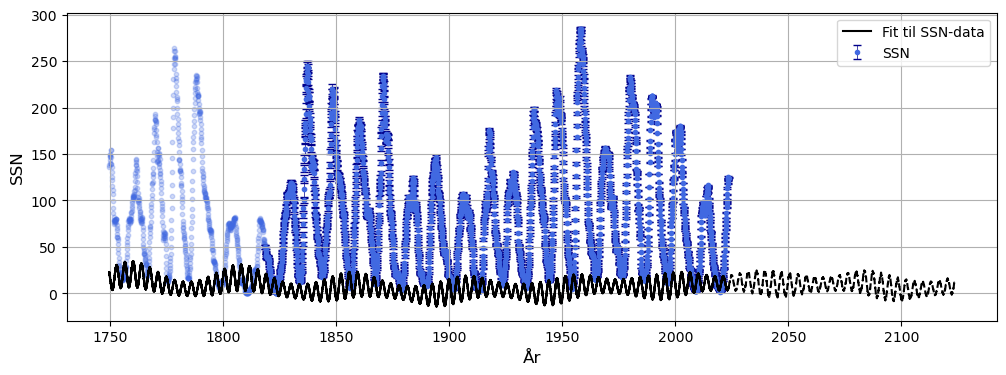

Parametre
[8912.438761275129, 0.12025409151072791, -30.824335982228416, -21601.24547462678, -1.7091162525562957, 0.23864844628274148, -1827.2548430979855, 33312.72367494393, 1836.7059203392034, -619.5211962947512, -54.002518852213434, 865.990105292818, -10151.536102504051, 0.02252307914348018, -50.61667775371993, -14711.265326483785, -0.00014133348818253335, 0.1328759817411419, 113.32225853358335, -0.0004675556185875506]
Usikkerheder på parametrene
[85208026.30899248, 9.819968561892617e-05, 0.19405316010374227, 206520297.3723717, 2.8966228586578455e-05, 0.0581233193612931, 17469600.687427264, 0.0003375482192780636, 0.5711048672586811, 5922977.639283681, 0.000979493371723145, 1.967331291994023, 97054507.61238293, 0.00022066162677509199, 0.4223335954251766, 140648134.32275194, 1.351229215151157, 0.0001218671932398534, 0.2433434853685469, 4.470099868739326]


In [21]:
x=np.linspace(SSN_date_fraction_arr[0], SSN_date_fraction_arr[-1], 10000)
x2 = np.linspace(SSN_date_fraction_arr_old[0], SSN_date_fraction_arr[0], 10000)
x3 = np.linspace(SSN_date_fraction_arr[-1], SSN_date_fraction_arr_old[-1] + 100, 10000)

plt.figure(figsize=(12,4))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr_old, SSN_arr_old, s=ScatterSize, color=color_SSN, alpha=0.25, zorder=0)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="SSN", yerr=SSN_uncert_arr, fmt='.', ecolor=color_SSN_uncert, color=color_SSN, elinewidth=0.5, capsize=3,  zorder=1)
plt.plot(x, sin6(x, *Var6), label='Fit til SSN-data', color='black')
plt.plot(x2, sin6(x2, *Var6),color='black', linestyle="--")
plt.plot(x3, sin6(x3, *Var6),color='black', linestyle="--")
plt.xlabel('År', fontsize=12)
plt.ylabel('SSN', fontsize=12)
plt.legend()
plt.show()

# Print parametre
print("Parametre")
print(list(Var6))

# Gem usikkerheder på parametrene og print dem
Var6_uncert = np.sqrt(np.diag(Cov6))
print("Usikkerheder på parametrene")
print(list(Var6_uncert))



NameError: name 'sin7' is not defined

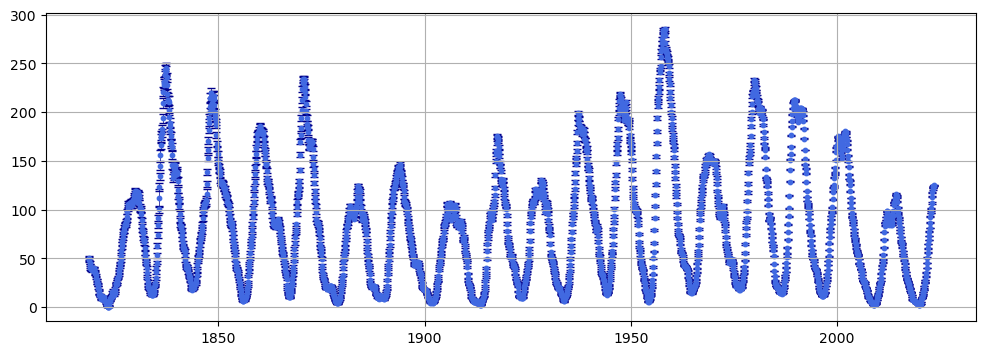

In [ ]:
x=np.linspace(SSN_date_fraction_arr[0], SSN_date_fraction_arr[-1] + 100, 10000)

plt.figure(figsize=(12,4))

plt.grid(True)
plt.scatter(SSN_date_fraction_arr, SSN_arr, label='SSN', s=ScatterSize, c=color_SSN)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="Usikkerhed på SSN", yerr=SSN_uncert_arr, fmt='none', color=color_SSN_uncert, elinewidth=0.5, capsize=3,  zorder=0)
plt.plot(x, sin7(x, *Var7), label='Fit til SSN-data', color='black')
plt.xlabel('År')
plt.ylabel('SSN')
plt.title('Fit til SSN-data')
plt.legend()
plt.show()



## Fit efter maksimum

In [ ]:
# Peak data
Peak_dates = [1761.455, 1769.707, 1778.371, 1788.124, 1805.123, 1816.373, 1829.874, 1837.204,
 1848.124, 1860.124, 1870.623, 1883.958, 1894.042, 1906.123, 1917.623, 1928.29,
 1937.288, 1947.371, 1958.204, 1968.874, 1979.958, 1989.874, 2001.874, 2014.288]

Peak_values = [144.1, 193, 264.3, 235.3, 82, 81.2, 119.2, 244.9, 219.9, 186.2, 234, 124.4,
 146.5, 107.1, 175.7, 130.2, 198.6, 218.7, 285, 156.6, 232.9, 212.5, 180.3, 116.4]

Peak_uncert = [1,       1,         1,         1,         1,         1,
 3.16593713, 5.71576766, 5.21418184, 3.10111215, 3.08921119, 2.24506628,
 1.93973726, 1.73863658, 2.11934256, 1.8622567, 2.30043474, 1.84993461,
 2.02953991, 1.53362316, 1.83197408, 0.54152982, 0.47870158, 0.37195955,
 0.54349298]

# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
pVar1 , pCov1 = curve_fit(sin1 , Peak_dates , Peak_values , maxfev=10000 , p0=[1000, 0.06, 500, 50])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return (a1 * np.sin( x * b1 + c1 ) + d1) * (a2 * np.sin( x * b2 + c2 ) + d2)
pVar2 , pCov2 = curve_fit(sin2 , Peak_dates , Peak_values , maxfev=10000 , p0=[*pVar1,1,1,1,1])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return (a1 * np.sin( x * b1 + c1 ) + d1) * (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3)
pVar3 , pCov3 = curve_fit(sin3 , Peak_dates , Peak_values , maxfev=10000 , p0=[*pVar2,1,1,1,1])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return (a1 * np.sin( x * b1 + c1 ) + d1) * (a2 * np.sin( x * b2 + c2 ) + d2) * (a3 * np.sin( x * b3 + c3 ) + d3) + a4 * np.sin( x * b4 + c4 ) + d4
pVar4 , pCov4 = curve_fit(sin4 , Peak_dates , Peak_values , maxfev=10000 , p0=[*pVar3,1,1,1,1])




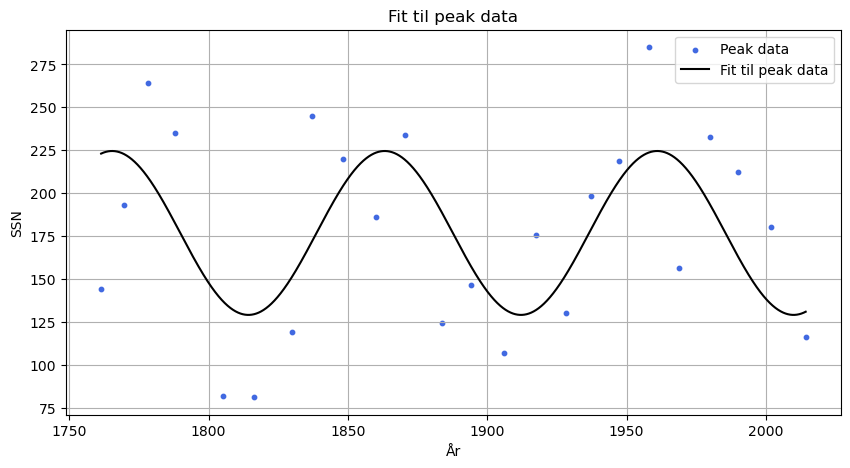

In [ ]:
x=np.linspace(Peak_dates[0], Peak_dates[-1], 10000)

# Plot
plt.figure(figsize=(10, 5))

plt.grid(True)
plt.scatter(Peak_dates, Peak_values, label='Peak data', s=ScatterSize, c=color_SSN)
plt.plot(x, sin1(x, *pVar1), label='Fit til peak data', color='black')
plt.xlabel('År')
plt.ylabel('SSN')
plt.title('Fit til peak data')
plt.legend()
plt.show()


## Chi-kvadrat

In [ ]:
# chi_kvadrat
def module_chi_squared(obs_data, model_data, obs_data_uncert):
    chi_squared = np.sum(((obs_data - model_data) / obs_data_uncert) ** 2)
    return chi_squared

# Reduceret chi_kvadrat
def module_chi_squared_reduced(obs_data, model_data, obs_data_uncert, num_params):
    chi_squared_reduced = module_chi_squared(obs_data, model_data, obs_data_uncert) / (len(obs_data) - num_params)
    return chi_squared_reduced



In [ ]:
# Udregn chi-kvadrat for hvert fit
chi_squared_1 = module_chi_squared(SSN_arr, sin1(SSN_date_fraction_arr, *Var1), SSN_uncert_arr)
chi_squared_2 = module_chi_squared(SSN_arr, sin2(SSN_date_fraction_arr, *Var2), SSN_uncert_arr)
chi_squared_3 = module_chi_squared(SSN_arr, sin3(SSN_date_fraction_arr, *Var3), SSN_uncert_arr)
chi_squared_4 = module_chi_squared(SSN_arr, sin4(SSN_date_fraction_arr, *Var4), SSN_uncert_arr)
chi_squared_5 = module_chi_squared(SSN_arr, sin5(SSN_date_fraction_arr, *Var5), SSN_uncert_arr)
chi_squared_6 = module_chi_squared(SSN_arr, sin6(SSN_date_fraction_arr, *Var6), SSN_uncert_arr)
chi_squared_7 = module_chi_squared(SSN_arr, sin7(SSN_date_fraction_arr, *Var7), SSN_uncert_arr)
chi_squared_8 = module_chi_squared(SSN_arr, sin8(SSN_date_fraction_arr, *Var8), SSN_uncert_arr)
chi_squared_9 = module_chi_squared(SSN_arr, sin9(SSN_date_fraction_arr, *Var9), SSN_uncert_arr)

# Udregn reduceret chi-kvadrat for hvert fit
chi_squared_reduced_1 = module_chi_squared_reduced(SSN_arr, sin1(SSN_date_fraction_arr, *Var1), SSN_uncert_arr, 4)
chi_squared_reduced_2 = module_chi_squared_reduced(SSN_arr, sin2(SSN_date_fraction_arr, *Var2), SSN_uncert_arr, 8)
chi_squared_reduced_3 = module_chi_squared_reduced(SSN_arr, sin3(SSN_date_fraction_arr, *Var3), SSN_uncert_arr, 12)
chi_squared_reduced_4 = module_chi_squared_reduced(SSN_arr, sin4(SSN_date_fraction_arr, *Var4), SSN_uncert_arr, 16)
chi_squared_reduced_5 = module_chi_squared_reduced(SSN_arr, sin5(SSN_date_fraction_arr, *Var5), SSN_uncert_arr, 20)
chi_squared_reduced_6 = module_chi_squared_reduced(SSN_arr, sin6(SSN_date_fraction_arr, *Var6), SSN_uncert_arr, 24)
chi_squared_reduced_7 = module_chi_squared_reduced(SSN_arr, sin7(SSN_date_fraction_arr, *Var7), SSN_uncert_arr, 28)
chi_squared_reduced_8 = module_chi_squared_reduced(SSN_arr, sin8(SSN_date_fraction_arr, *Var8), SSN_uncert_arr, 32)
chi_squared_reduced_9 = module_chi_squared_reduced(SSN_arr, sin9(SSN_date_fraction_arr, *Var9), SSN_uncert_arr, 36)

print("chi_squared_1: ", chi_squared_1)
print("chi_squared_2: ", chi_squared_2)
print("chi_squared_3: ", chi_squared_3)
print("chi_squared_4: ", chi_squared_4)
print("chi_squared_5: ", chi_squared_5)
print("chi_squared_6: ", chi_squared_6)
print("chi_squared_7: ", chi_squared_7)
print("chi_squared_8: ", chi_squared_8)
print("chi_squared_9: ", chi_squared_9)

print()

print("chi_squared_reduced_1: ", chi_squared_reduced_1)
print("chi_squared_reduced_2: ", chi_squared_reduced_2)
print("chi_squared_reduced_3: ", chi_squared_reduced_3)
print("chi_squared_reduced_4: ", chi_squared_reduced_4)
print("chi_squared_reduced_5: ", chi_squared_reduced_5)
print("chi_squared_reduced_6: ", chi_squared_reduced_6)
print("chi_squared_reduced_7: ", chi_squared_reduced_7)
print("chi_squared_reduced_8: ", chi_squared_reduced_8)
print("chi_squared_reduced_9: ", chi_squared_reduced_9)



chi_squared_1:  23955790.807590954
chi_squared_2:  4.030209525321998e+33
chi_squared_3:  1521924017089.6755
chi_squared_4:  2.1351908323085844e+20
chi_squared_5:  26065796.22635727
chi_squared_6:  8356802.631733894
chi_squared_7:  8650660.373359023
chi_squared_8:  7377675.836724553
chi_squared_9:  5760494.906389668

chi_squared_reduced_1:  9750.016608706126
chi_squared_reduced_2:  1.6429716776689758e+30
chi_squared_reduced_3:  621447128.2522154
chi_squared_reduced_4:  8.732886839707912e+16
chi_squared_reduced_5:  10678.327007930058
chi_squared_reduced_6:  3429.1352612777573
chi_squared_reduced_7:  3555.552968910408
chi_squared_reduced_8:  3037.3305215004334
chi_squared_reduced_9:  2375.461817067904


# Fit kun med data efter hvor der også er magnetfeltsdata

In [ ]:
# Skær arrays til så de har samme længde
min_length = min(len(SSN_arr), len(wso_smoothed_magnetic_field_arr))
SSN_arr = SSN_arr[-min_length:]
SSN_date_fraction_arr = SSN_date_fraction_arr[-min_length:]
SSN_uncert_arr = SSN_uncert_arr[-min_length:]
wso_smoothed_magnetic_field_arr = wso_smoothed_magnetic_field_arr[-min_length:]
wso_smoothed_uncert_arr = wso_smoothed_uncert_arr[-min_length:]



In [ ]:
# Fitting

guess6 = "-1830.7991628503528 0.11463396647006208 -41.8435005496725 -33286.960050892056 -1.7092473002101747 -0.06082285788548878 142.72177741674702 33312.73579656044 1829.8443727031058 0.11462460695763366 -54.39202596655013 89.88350715980764 -236.8003328013286 -0.0006882305476911399 90.79138890378951 68.9793140547413 -1.0249714319490588 0.1286004624939206 104.73177774481829 55.96194567874268 11.436101374088974 0.5711879226607226 -30.401004134319383 19.212479087233667".split(" ")
guess6 = [float(i) for i in guess6]

#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:4])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var2 , Cov2 = curve_fit(sin2 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:8])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3
Var3 , Cov3 = curve_fit(sin3 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=guess6[:12])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4
Var4 , Cov4 = curve_fit(sin4 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var3,1,1/11,100,80])

# 5
def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
Var5 , Cov5 = curve_fit(sin5 , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000 , p0=[*Var4,1,1/5.5,1,1])

# 6
def sin5_1_offset(x,a1,b1,c1,a2,b2,c2,a3,b3,c3,a4,b4,c4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + a2 * np.sin( x * b2 + c2 ) + a3 * np.sin( x * b3 + c3 ) + a4 * np.sin( x * b4 + c4 ) + a5 * np.sin( x * b5 + c5 ) + d5
Var5_1_off , Cov5_1_off = curve_fit(sin5_1_offset , SSN_date_fraction_arr , SSN_arr , sigma=SSN_uncert_arr , absolute_sigma=True , maxfev=10000, p0=[-79.80304918007994, 0.5781201110441594, -970.5869776850946, -27.920069586058016, 0.7027072800106726, -1299.5137732153557, 30.990499020412056, 0.10854315225975406, -44.67117979277153, 13.296108420748888, 1.079308227086001, -1882.138690098061, 19.083472002376485, 0.35499660758783963, -344.5831086750815, 76.65565902091087])




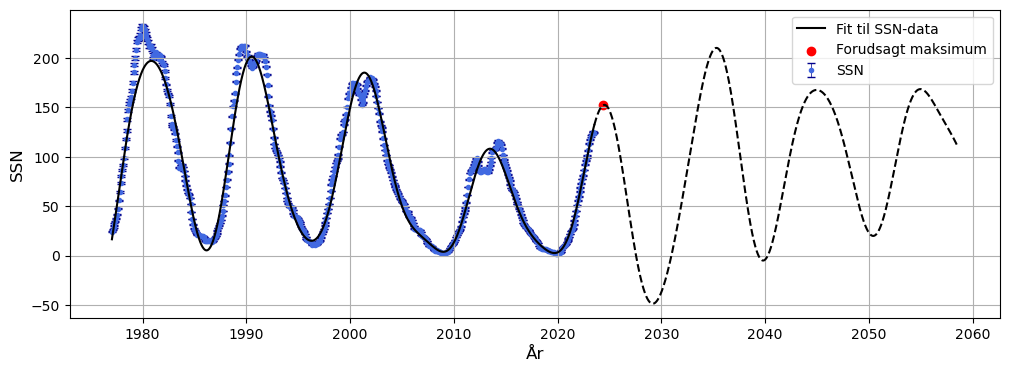

Parametre
[-79.80296424094624, 0.5781201048681558, -970.586964295158, -27.920027282967368, 0.7027076361870036, -1299.5144869966882, 30.990479685833638, 0.10854333649876777, -44.67155033165754, 13.296131512500814, 1.0793080649503104, -1882.1383628317853, 19.083483188353732, 0.35499693332748794, -344.583761085812, 76.65563442418687]
Usikkerheder på parametrene
[0.033807233227557194, 5.625616595857295e-05, 0.11282248766191845, 0.03406945176105247, 0.00010992327841474117, 0.22090032750523095, 0.016161478504443227, 9.818195801891714e-05, 0.19664482925259225, 0.013199691067431869, 8.791622770841631e-05, 0.1766310895762873, 0.01984619168191127, 0.00014993058345535138, 0.30020095729257423, 0.02106285144131015]


In [ ]:
x=np.linspace(SSN_date_fraction_arr[0], SSN_date_fraction_arr[-1], 10000)
x2 = np.linspace(SSN_date_fraction_arr_old[-1], SSN_date_fraction_arr[-1] + 35, 10000)

# Set of colours for the first data
color_SSN = 'royalblue'  # Colour for the data points
color_SSN_uncert = 'darkblue'  # Colour for the uncertainties

# Set of colours for the second data
color_WSO = 'darkorange'  # Colour for the data points
color_WSO_uncert = 'crimson'  # Colour for the uncertainties

plt.figure(figsize=(12,4))

plt.grid(True)
#plt.errorbar(SSN_date_fraction_arr, wso_smoothed_magnetic_field_arr, label="Magnetfeltsstyrke", fmt='.', yerr=wso_smoothed_uncert_arr, ecolor=color_WSO_uncert, c=color_WSO, elinewidth=0.5, capsize=3,  zorder=0)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="SSN", yerr=SSN_uncert_arr, fmt='.', ecolor=color_SSN_uncert, c=color_SSN, elinewidth=0.5, capsize=3,  zorder=0)
plt.plot(x, sin5_1_offset(x, *Var5_1_off), label='Fit til SSN-data', color='black')
plt.plot(x2, sin5_1_offset(x2, *Var5_1_off),color='black', linestyle="--")
plt.scatter(2024.4, sin5_1_offset(2024.4, *Var5_1_off), color="red", label="Forudsagt maksimum")
plt.xlabel('År', fontsize=12)
plt.ylabel(r'SSN', fontsize=12)
plt.legend()
plt.show()

# Print parametre
print("Parametre")
print(list(Var5_1_off))

# Gem usikkerheder på parametrene og print dem
Var5_1_off_uncert = np.sqrt(np.diag(Cov5_1_off))
print("Usikkerheder på parametrene")
print(list(Var5_1_off_uncert))


In [ ]:
def sin_diff_a(a,b,c,d,x):
    return np.sin( x * b + c ) + d

def sin_diff_b(a,b,c,d,x):
    return x*a * np.cos( x * b + c )

def sin_diff_c(a,b,c,d,x):
    return a * np.cos( x * b + c )

def sin_diff_d(a,b,c,d,x):
    return 1

def sin_diff_x(a,b,c,d,x):
    return a * b * np.cos( x * b + c)

Var5 = [[-82.08503892921239, 0.5816217399310111, -977.6164112982384, -35880.230913746054], [-29.925763153410156, 0.693832151539484, -1281.661289973824, 248821995.9095316], [33.189110838742614, 0.08626054783623055, -0.054866500171416525, -85481989.18591893], [13.049636638486838, 1.078616045121271, -1880.7299167909691, 49603976.30043433], [20.548281459930827, 0.351594748401927, -337.70572274606104, -212908026.9929897]]

Var5_uncert = [[0.044509160677488356, 5.809422013491338e-05, 0.11655413010900215, 628.2444366469879], [0.04568929263283705, 0.00011218969141985795, 0.22541141190505073, 7914018945375.611], [0.016281049201958376, 7.015657645998893e-07, 0.000229837249087437, 335197.9508999403], [0.01290005373525978, 8.994716049538728e-05, 0.18070786725856308, 197237.76861034427], [0.020344987743961363, 0.0001294130827698496, 0.2590793804371877, 7914018993575.766]]

Var5_new = [[-79.80304918007994, 0.5781201110441594, -970.5869776850946, 0], [-27.920069586058016, 0.7027072800106726, -1299.5137732153557, 0], [30.990499020412056, 0.10854315225975406, -44.67117979277153, 0], [13.296108420748888, 1.079308227086001, -1882.138690098061, 0], [19.083472002376485, 0.35499660758783963, -344.5831086750815, 76.65565902091087]]

Var5_uncert_new = [[0.033809267008383714, 5.625601225515321e-05, 0.11282219694007305, 0], [0.0340715637692957, 0.00010992670631153032, 0.22090722464504897, 0], [0.01616200232039717, 9.818801261554529e-05, 0.1966569556994456, 0], [0.01319971051308794, 8.791779991251015e-05, 0.17663425305895697, 0], [0.01984619179841669, 0.00014992525827132015, 0.3001902699213737, 0.021064114662538148]]


# Udregn usikkerheden på forudsigelsen
x = 2024.4
d_x = 0

res = 0
for i in range(5):
    res += (sin_diff_a(*Var5_new[i], x) * Var5_uncert_new[i][0])**2 + (sin_diff_b(*Var5_new[i], x) * Var5_uncert_new[i][1])**2 + (sin_diff_c(*Var5_new[i], x) * Var5_uncert_new[i][2])**2 + (sin_diff_d(*Var5_new[i], x) * Var5_uncert_new[i][3])**2 + (sin_diff_x(*Var5_new[i], x) * d_x)**2

res = np.sqrt(res)

print(f"Forudsigelse: {round(sin5_1_offset(2024.4, *Var5_1_off))} +- {round(res)}" )
print("Antages: 2024.4")


Forudsigelse: 152 +- 13
Antages: 2024.4


11 192 112 959 517.188

$\approx 11$ billioner

WTF!!!

In [ ]:
print("Chi værdier for sin5_1_offset")
print(module_chi_squared_reduced(SSN_arr, sin5_1_offset(SSN_date_fraction_arr, *Var5_1_off), SSN_uncert_arr, len(Var5_1_off)))
print(module_chi_squared(SSN_arr, sin5_1_offset(SSN_date_fraction_arr, *Var5_1_off), SSN_uncert_arr))


Chi værdier for sin5_1_offset
1068.6107762844786
580255.6515224718


# Sejt plot af forudsigelse
(forhåbentlig)

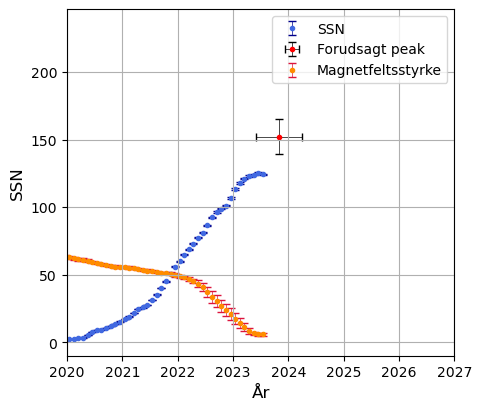

In [ ]:
# Set of colours for the first data
color_SSN = 'royalblue'  # Colour for the data points
color_SSN_uncert = 'darkblue'  # Colour for the uncertainties

# Set of colours for the second data
color_WSO = 'darkorange'  # Colour for the data points
color_WSO_uncert = 'crimson'  # Colour for the uncertainties

predict_color = "red"
predict_uncert_color = "black"

plt.figure(figsize=(5,4.5))

plt.grid(True)
#plt.errorbar(SSN_date_fraction_arr, wso_smoothed_magnetic_field_arr, label="Magnetfeltsstyrke", fmt='.', yerr=wso_smoothed_uncert_arr, ecolor=color_WSO_uncert, c=color_WSO, elinewidth=0.5, capsize=3,  zorder=0)
plt.errorbar(SSN_date_fraction_arr, SSN_arr, label="SSN", yerr=SSN_uncert_arr, fmt='.', ecolor=color_SSN_uncert, c=color_SSN, elinewidth=0.5, capsize=3,  zorder=0)
plt.errorbar(2023 + 10/12, 152, xerr=5/12, yerr=round(res), fmt='.', ecolor=predict_uncert_color, c=predict_color, elinewidth=0.5, capsize=3,  zorder=0, label="Forudsagt peak")
plt.errorbar(SSN_date_fraction_arr, wso_smoothed_magnetic_field_arr, label="Magnetfeltsstyrke", fmt='.', yerr=wso_smoothed_uncert_arr, ecolor=color_WSO_uncert, c=color_WSO, elinewidth=0.5, capsize=3,  zorder=0)
plt.xlabel('År', fontsize=12)
plt.ylabel(r'SSN', fontsize=12)
plt.xlim(2020, 2027)
plt.legend()
plt.show()


